In [ ]:
import random
from deap import base, creator, tools, algorithms
import numpy as np

# 定义适应度函数和个体
# 创建一个以最小化适应度为目标的适应度类
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# 创建个体类，继承自list，并包含FitnessMin对象作为其适应度属性
creator.create("Individual", list, fitness=creator.FitnessMin)

# 定义供应商和流程相关的参数
# 供应商1的次品率和采购成本、检验成本
defect_rate_1 = 0.1
purchase_cost_1 = 4
inspection_cost_1 = 2

# 供应商2的次品率和采购成本、检验成本
defect_rate_2 = 0.1
purchase_cost_2 = 18
inspection_cost_2 = 3

# 最终产品的次品率、装配成本、最终检验成本、市场售价、调换损失、拆卸成本
defect_rate_final = 0.1
assembly_cost = 6
inspection_cost_final = 3
market_price = 56
replacement_loss = 6
disassembly_cost = 5

# 定义适应度函数
def eval_solution(individual):
    # individual 是一个包含四个二进制值的列表，分别对应是否检验供应商1、供应商2、最终产品、是否拆卸
    x1, x2, y, z = individual

    # 计算采购和检验成本
    cost_purchase_1 = (1 - x1) * purchase_cost_1  # 如果不检验供应商1的产品，产生采购成本
    cost_purchase_2 = (1 - x2) * purchase_cost_2  # 如果不检验供应商2的产品，产生采购成本
    cost_inspection_1 = x1 * inspection_cost_1    # 如果检验供应商1的产品，产生检验成本
    cost_inspection_2 = x2 * inspection_cost_2    # 如果检验供应商2的产品，产生检验成本
    cost_assembly = assembly_cost                 # 装配成本固定
    cost_inspection_final = y * inspection_cost_final  # 如果对最终产品进行检验，产生检验成本
    cost_market = (1 - y) * market_price          # 如果不检验，产品进入市场并产生市场销售收入
    cost_replacement = replacement_loss           # 调换损失固定
    cost_disassembly = z * disassembly_cost       # 如果进行拆卸，产生拆卸成本

    # 计算最终次品率
    defect_rate_final_effective = (1 - (1 - defect_rate_1 * x1) * (1 - defect_rate_2 * x2)) * (1 - y)
    
    # 计算根据次品率引起的调换成本
    replacement_cost = defect_rate_final_effective * cost_replacement

    # 计算总成本：包括采购、检验、装配、市场销售、调换和拆卸等所有相关成本
    total_cost = (cost_purchase_1 + cost_purchase_2 + cost_inspection_1 + cost_inspection_2 + 
                  cost_assembly + cost_inspection_final - cost_market + 
                  replacement_cost + 
                  (1 - defect_rate_final_effective) * cost_disassembly)

    # 返回总成本作为适应度
    return total_cost,

# 初始化遗传算法工具箱
toolbox = base.Toolbox()
# 注册生成0或1的二进制属性（即基因）
toolbox.register("attr_bool", random.randint, 0, 1)
# 注册个体，个体由4个二进制基因组成
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 4)
# 注册种群，由多个个体组成
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 注册遗传算法的操作
# 注册评估函数，用于计算适应度
toolbox.register("evaluate", eval_solution)
# 注册交叉操作，使用两点交叉法
toolbox.register("mate", tools.cxTwoPoint)
# 注册变异操作，使用按位翻转，变异概率为0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# 注册选择操作，使用锦标赛选择法，锦标赛规模为3
toolbox.register("select", tools.selTournament, tournsize=3)

# 定义遗传算法的主函数
def main():
    # 设置随机数种子，确保每次运行结果一致
    random.seed(64)
    # 生成初始种群，包含300个个体
    pop = toolbox.population(n=300)
    # 使用HallOfFame保存最优个体
    hof = tools.HallOfFame(1)
    # 定义统计信息，收集每一代的适应度数据
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)  # 注册统计平均值
    stats.register("std", np.std)   # 注册统计标准差
    stats.register("min", np.min)   # 注册统计最小值
    stats.register("max", np.max)   # 注册统计最大值
    
    # 运行遗传算法，使用简单的进化算法（eaSimple），设置交叉概率0.5，变异概率0.2，迭代40代
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    # 返回最终种群、日志和最优个体
    return pop, log, hof

# 主程序入口
if __name__ == "__main__":
    # 运行主函数
    pop, log, hof = main()
    # 输出最优个体和其适应度值
    best_individual = hof.items[0]
    print("Best Individual:", best_individual)
    print("Best Fitness:", best_individual.fitness.values[0])


gen	nevals	avg    	std    	min	max  
0  	300   	3.35927	28.2329	-25	39.14
1  	178   	-18.0573	16.018 	-25	36.6 
2  	184   	-23.6627	6.41305	-25	35.6 
3  	185   	-23.86  	7.545  	-25	33   
4  	180   	-24.3867	5.45501	-25	33   
5  	188   	-24.5967	4.32365	-25	28   
6  	168   	-24.5933	4.72454	-25	33   
7  	176   	-24.6033	4.32273	-25	28   
8  	173   	-24.188 	6.46208	-25	35.6 
9  	165   	-24.428 	5.36569	-25	30.6 
10 	189   	-24.2167	6.23295	-25	33   
11 	180   	-24.7467	3.36291	-25	33   
12 	193   	-23.658 	8.40977	-25	33   
13 	182   	-24.77  	3.07524	-25	28   
14 	180   	-24.1633	6.24099	-25	33   
15 	172   	-24.6033	4.72222	-25	33   
16 	182   	-24.3833	5.77608	-25	33   
17 	182   	-23.2853	9.49579	-25	36.6 
18 	177   	-24.5733	4.72701	-25	33   
19 	190   	-24.6133	4.52443	-25	33   
20 	164   	-24.588 	4.6682 	-25	33   
21 	160   	-24.228 	6.59155	-25	35.6 
22 	183   	-24.3667	5.45456	-25	33   
23 	178   	-24.7813	3.21611	-25	30.6 
24 	165   	-24.4533	5.27584	-25	28   
25 	177   	-24

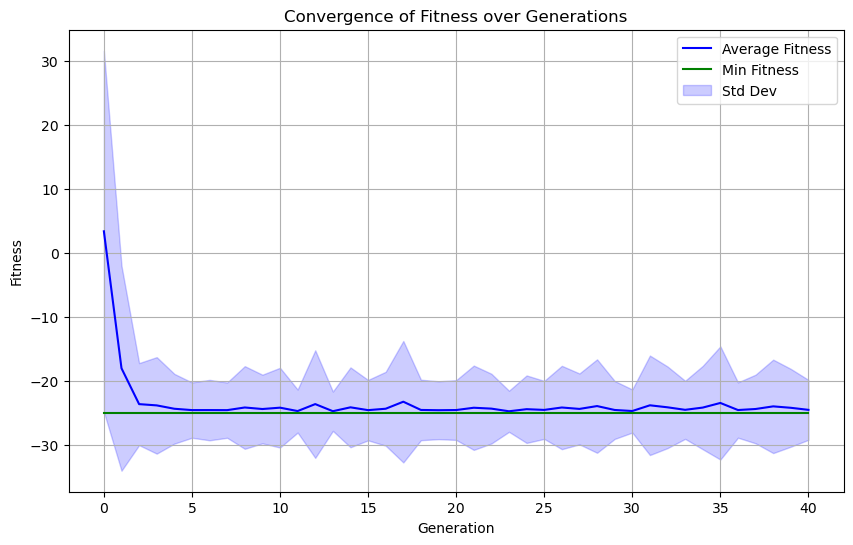

Best Individual: [0, 0, 1, 0]
Best Fitness: -25.0


In [17]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt

# 定义适应度函数和个体
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# 定义供应商和流程相关的参数
defect_rate_1 = 0.1
purchase_cost_1 = 4
inspection_cost_1 = 2

defect_rate_2 = 0.1
purchase_cost_2 = 18
inspection_cost_2 = 3

assembly_cost = 6
inspection_cost_final = 3
market_price = 56
replacement_loss = 6
disassembly_cost = 5

# 定义适应度函数
def eval_solution(individual):
    x1, x2, y, z = individual

    # 采购成本（无论是否检验都要支付）
    cost_purchase_1 = purchase_cost_1
    cost_purchase_2 = purchase_cost_2

    # 检验成本
    cost_inspection_1 = x1 * inspection_cost_1  # 是否选择检验供应商1的产品
    cost_inspection_2 = x2 * inspection_cost_2  # 是否选择检验供应商2的产品

    # 装配成本
    cost_assembly = assembly_cost  # 固定的装配成本
    cost_inspection_final = y * inspection_cost_final  # 是否进行最终检验

    # 计算缺陷率（考虑两次检验影响后的最终缺陷率）
    defect_rate_final_effective = (1 - (1 - defect_rate_1 * x1) * (1 - defect_rate_2 * x2))

    # 如果最终检验通过，产品可以销售；否则需要进行拆卸或更换
    if y == 1:
        # 通过最终检验，按市场价格卖出
        cost_market = market_price
        replacement_cost = 0  # 不需要更换
        disassembly_cost_final = 0  # 不需要拆卸
    else:
        # 未通过检验，无法销售，产生拆卸成本或更换成本
        cost_market = 0  # 无法销售，收入为0
        replacement_cost = defect_rate_final_effective * replacement_loss  # 缺陷品更换损失
        disassembly_cost_final = z * disassembly_cost  # 拆卸费用

    # 计算总成本
    total_cost = (cost_purchase_1 + cost_purchase_2 +
                  cost_inspection_1 + cost_inspection_2 + 
                  cost_assembly + cost_inspection_final + 
                  replacement_cost + disassembly_cost_final - cost_market)

    return total_cost,

# 初始化遗传算法工具箱
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 4)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval_solution)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# 遗传算法主函数
def main():
    random.seed(64)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # 运行遗传算法并获取日志
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    # 提取日志数据
    gen = log.select("gen")      # 每一代的编号
    avg = log.select("avg")      # 每一代的平均适应度值
    std = log.select("std")      # 每一代的适应度标准差
    min_ = log.select("min")     # 每一代的最小适应度值
    max_ = log.select("max")     # 每一代的最大适应度值
    
    # 绘制收敛图
    plt.figure(figsize=(10, 6))
    plt.plot(gen, avg, label="Average Fitness", color="blue")
    plt.plot(gen, min_, label="Min Fitness", color="green")
    plt.fill_between(gen, np.array(avg) - np.array(std), np.array(avg) + np.array(std),
                     color="blue", alpha=0.2, label="Std Dev")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Convergence of Fitness over Generations")
    plt.legend()
    plt.grid(True)
    plt.show()

    return pop, log, hof

# 主程序入口
if __name__ == "__main__":
    pop, log, hof = main()
    best_individual = hof.items[0]
    print("Best Individual:", best_individual)
    print("Best Fitness:", best_individual.fitness.values[0])
